In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape



(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

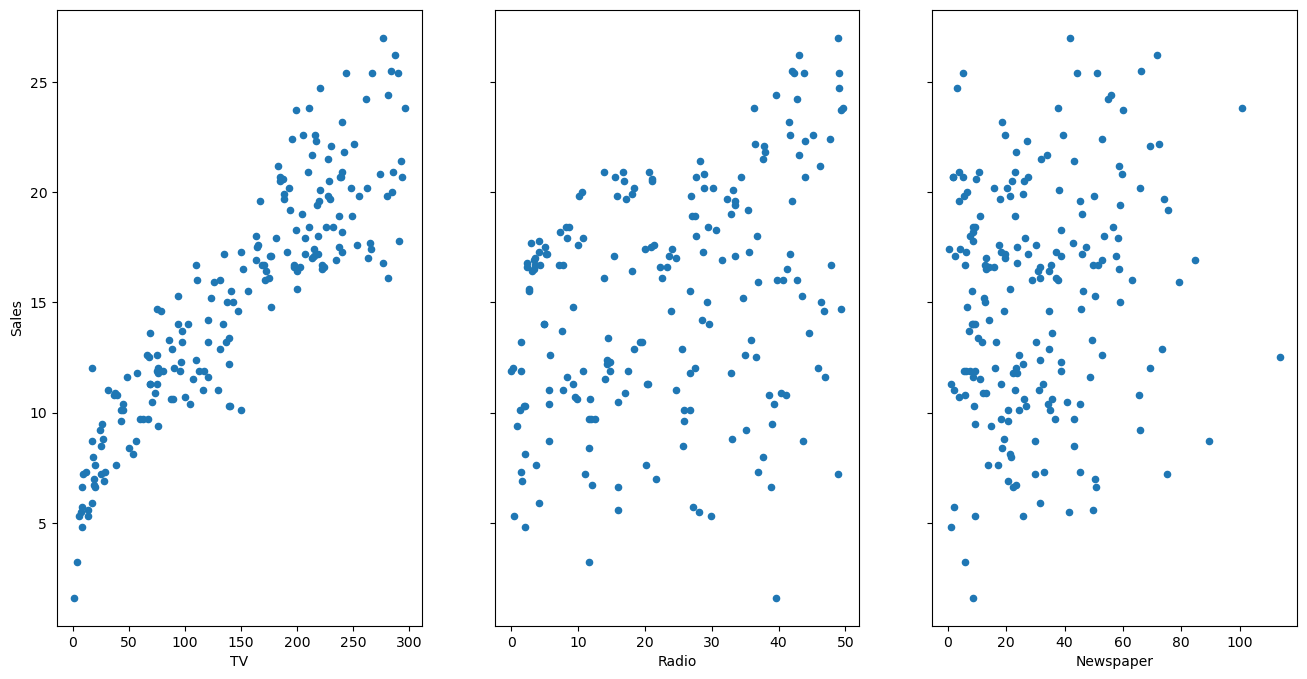

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter',x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter',x='Radio',y='Sales', ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales', ax=axs[2])

In [10]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)

print(lm.intercept_)
print(lm.coef_)


6.9748214882298925
[0.05546477]


In [11]:
6.97482 + 0.055467*50

9.74817

In [14]:
x_new = pd.DataFrame({'TV': [50]})
x_new.head()

,TV
0,50


In [15]:
lm.predict(x_new)

array([9.74806001])

In [17]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,50


In [18]:
preds = lm.predict(x_new)
preds

array([9.74806001])

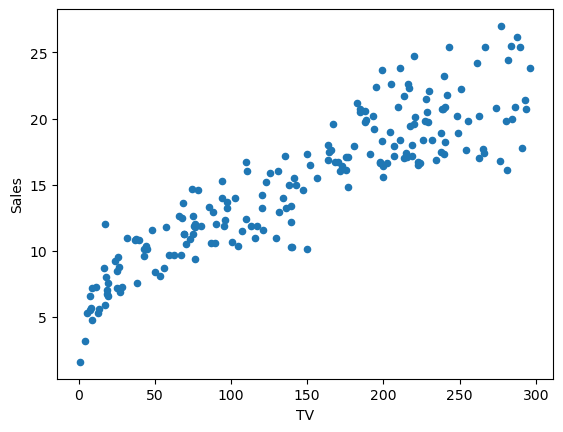

In [25]:

data.plot(kind='scatter', x='TV', y='Sales')

plt.plot(x_new, preds, c='orange', linewidth=2)

In [30]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [31]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [32]:
lm.rsquared

0.8121757029987414

In [34]:
feature_cols = ['TV', 'Radio', 'Newspaper']
x = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(x,y)
    
    
print(lm.intercept_)
print(lm.coef_)

4.625124078808652
[0.05444578 0.10700123 0.00033566]


In [37]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000023652194250>>

In [40]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558

In [41]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558